In [2]:
#Step1:The amazon dataset was downloaded and extracted into a txt file so we’ll use Python’s built-in file handling to read the text file line by line.
import pandas as pd

# Path to your unzipped text file
file_path = r"C:\Users\dspf1\Downloads\test.ft.txt.bz2\test.ft.txt\test.ft.txt"

# Read the file line by line
with open(file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Convert to a DataFrame with column name Input
data = pd.DataFrame(lines, columns=["Input"])

# Display first 5 rows
print(data.head())

                                               Input
0  __label__2 Great CD: My lovely Pat has one of ...
1  __label__2 One of the best game music soundtra...
2  __label__1 Batteries died within a year ...: I...
3  __label__2 works fine, but Maha Energy is bett...
4  __label__2 Great for the non-audiophile: Revie...


In [3]:
#Step2: Split labels using space and 0th index
data["sentiment"] = data["Input"].apply(lambda x: x.split()[0])
# Split text using space and 1st index
data["review"] = data["Input"].apply(lambda x: " ".join(x.split()[1:]))

# Clean labels: __label__1 to 0 (negative), __label__2 to 1 (positive)
data["sentiment"] = data["sentiment"].str.replace("__label__1", "0")
data["sentiment"] = data["sentiment"].str.replace("__label__2", "1")
# convert to datatype int32
data["sentiment"] = data["sentiment"].astype(int)

# Drop the input column
data = data.drop("Input", axis=1)

# Display the cleaned DataFrame with columns sentiment and review
print(data.head())





   sentiment                                             review
0          1  Great CD: My lovely Pat has one of the GREAT v...
1          1  One of the best game music soundtracks - for a...
2          0  Batteries died within a year ...: I bought thi...
3          1  works fine, but Maha Energy is better: Check o...
4          1  Great for the non-audiophile: Reviewed quite a...


In [4]:
#preprocess the raw text data to make it suitable for NLP tasks like sentiment analysis. Preprocessing is critical because raw text contains noise (punctuation, stopwords, etc.) that can negatively impact model performance

#Step 3: Preprocess the Text Data in column review

#Convert all text to lowercase to ensure uniformity
data["review"] = data["review"].str.lower()
data["review"]

#Strip out punctuation, numbers, and non-alphabetic characters using regex.Punctuation like ! or ? doesn’t add meaningful information for sentiment analysis.

import re

def remove_punctuation(text):
    return re.sub(r"[^a-zA-Z\s]", "", text)  # Keeps only letters and whitespace

data["review"] = data["review"].apply(remove_punctuation)
data["review"]


#Split sentences into individual words (tokens).Models process text at the word level, not sentence level.
import nltk
nltk.download('punkt')       # For tokenization
nltk.download('stopwords')   # For stopword removal
nltk.download('wordnet')     # For lemmatization
nltk.download('omw-1.4')     # Required for WordNet lemmatizer
from nltk.tokenize import word_tokenize

data["tokens"] = data["review"].apply(word_tokenize)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dspf1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dspf1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dspf1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dspf1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
data["tokens"]

0         [great, cd, my, lovely, pat, has, one, of, the...
1         [one, of, the, best, game, music, soundtracks,...
2         [batteries, died, within, a, year, i, bought, ...
3         [works, fine, but, maha, energy, is, better, c...
4         [great, for, the, nonaudiophile, reviewed, qui...
                                ...                        
399995    [unbelievable, in, a, bad, way, we, bought, th...
399996    [almost, great, until, it, broke, my, son, rec...
399997    [disappointed, i, bought, this, toy, for, my, ...
399998    [classic, jessica, mitford, this, is, a, compi...
399999    [comedy, scene, and, not, heard, this, dvd, wi...
Name: tokens, Length: 400000, dtype: object

In [6]:
#Remove Stopwords
#Eliminate common words (e.g., "the", "and") that don’t contribute to sentiment.
#Reduces noise and focuses on meaningful words.

from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

data["tokens"] = data["tokens"].apply(remove_stopwords)


In [7]:
#Lemmatization
#Convert words to their base/dictionary form (e.g., "running" → "run")
#Ensures variations of a word are treated as the same token.

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

data["tokens"] = data["tokens"].apply(lemmatize_tokens)


In [8]:
#Rejoin Tokens into Strings.Convert the list of tokens back to a single string for modeling.

data["cleaned_review"] = data["tokens"].apply(lambda x: " ".join(x))
data["cleaned_review"] 

0         great cd lovely pat one great voice generation...
1         one best game music soundtrack game didnt real...
2         battery died within year bought charger jul wo...
3         work fine maha energy better check maha energy...
4         great nonaudiophile reviewed quite bit combo p...
                                ...                        
399995    unbelievable bad way bought thomas son huge th...
399996    almost great broke son recieved birthday gift ...
399997    disappointed bought toy son love thomas toy ne...
399998    classic jessica mitford compilation wide range...
399999    comedy scene heard dvd disappointment get hopi...
Name: cleaned_review, Length: 400000, dtype: object

In [9]:
#Lets verify preprocessing
print("Original:", data["review"].iloc[0])
print("Cleaned:", data["cleaned_review"].iloc[0])

Original: great cd my lovely pat has one of the great voices of her generation i have listened to this cd for years and i still love it when im in a good mood it makes me feel better a bad mood just evaporates like sugar in the rain this cd just oozes life vocals are jusat stuunning and lyrics just kill one of lifes hidden gems this is a desert isle cd in my book why she never made it big is just beyond me everytime i play this no matter black white young old male female everybody says one thing who was that singing 
Cleaned: great cd lovely pat one great voice generation listened cd year still love im good mood make feel better bad mood evaporates like sugar rain cd ooze life vocal jusat stuunning lyric kill one life hidden gem desert isle cd book never made big beyond everytime play matter black white young old male female everybody say one thing singing


In [10]:
#Preprocessing importance:
#Consistency: Ensures all text follows the same format.
#Efficiency: Reduces noise, improving model accuracy.
#Interpretability: Focuses on meaningful words for analysis.

In [11]:
#let's implement sentiment analysis using different NLP techniques. We'll compare three approaches:
#Rule-Based (VADER) - Quick, no training needed
#Traditional ML (TF-IDF + Logistic Regression) - Balanced accuracy/interpretability
#Deep Learning (BERT) - State-of-the-art performance

In [12]:
#Approach 1: Rule-Based Sentiment Analysis with VADER

#initiate the analyser
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Return compound score

# Apply to cleaned reviews
data['vader_score'] = data['cleaned_review'].apply(vader_sentiment)

# Convert to binary sentiment (0=negative, 1=positive)
data['vader_pred'] = data['vader_score'].apply(lambda x: 1 if x >= 0.05 else 0)


In [13]:
#Evaluate Performance.Compare VADER's predictions against your labeled sentiments.

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(data['sentiment'], data['vader_pred'])
print(f"VADER Accuracy: {accuracy:.2%}")

# Confusion Matrix
cm = confusion_matrix(data['sentiment'], data['vader_pred'])
print("Confusion Matrix:")
print(cm)

VADER Accuracy: 68.53%
Confusion Matrix:
[[ 87863 112137]
 [ 13738 186262]]


In [14]:
#Interpretation:
#68.53% Accuracy: Decent for a rule-based system.
#Confusion Matrix:
#87863 negative reviews correctly classified.
#112137 negative reviews misclassified as positive (false positives).
#186262 true positives
#13738 false negatives

In [15]:
#Analyze errors

# Find misclassified negative reviews (false positives)
false_positives = data[(data['sentiment'] == 0) & (data['vader_pred'] == 1)]

# Print examples
print("False Positives (Negative reviews labeled as positive):")
for text in false_positives['cleaned_review'].head(3):
    print(f"- {text}")

False Positives (Negative reviews labeled as positive):
- battery died within year bought charger jul worked ok design nice convenient however year battery would hold charge might well get alkaline disposable look elsewhere charger come battery better staying power
- incorrect disc love style couple year dvd giving problem doesnt even work anymore use broken p wouldnt recommend im going upgrade recorder wish would work guess im giving jvc really like one stopped working dvd player gave problem probably year
- dvd menu select problem scroll dvd menu set vertically triangle key select horizontally select anything dvd besides play special feature language select nothing play


In [16]:
#There are words like nice, convenient,ok,worked etc is weakly positive in VADER's lexicon.


Unique sentiment values: [1 0]


C:\Users\dspf1\AppData\Local\Temp\ipykernel_46828\306292105.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sentiment',


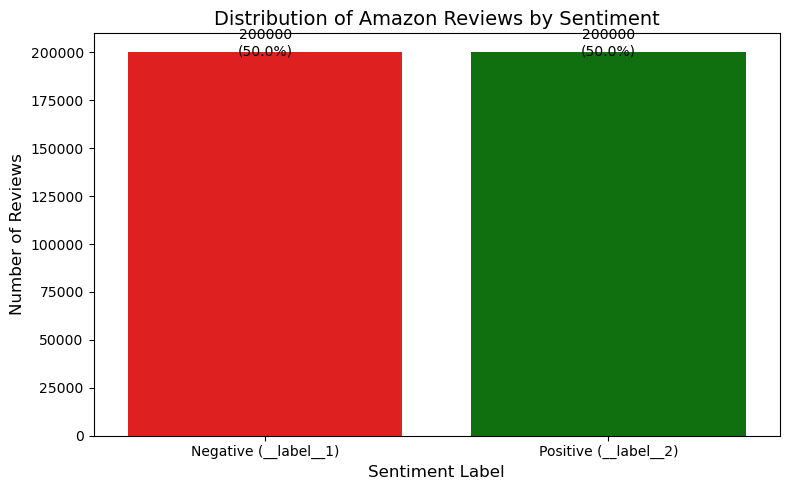

In [17]:
#Visualization
#Bar plot
import matplotlib.pyplot as plt
import seaborn as sns

# Verify the column name for sentiment labels 
print("Unique sentiment values:", data['sentiment'].unique())  

# Class Distribution Plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='sentiment', 
                   data=data, 
                   palette=['red', 'green'],
                   order=[0, 1])  # Force order: Negative (0) first

# Customize labels to match your data encoding
plt.title('Distribution of Amazon Reviews by Sentiment', fontsize=14)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Negative (__label__1)', 'Positive (__label__2)'])

# Add exact counts and percentages
total = len(data)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{100 * count/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 5000  # Adjust offset 
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='center')

plt.tight_layout()
plt.show()

In [18]:
#confirm class balance
print(data['sentiment'].value_counts())

sentiment
1    200000
0    200000
Name: count, dtype: int64


In [19]:
#check percentages match
print("Negative %:", 100 * len(data[data['sentiment']==0])/len(data))
print("Positive %:", 100 * len(data[data['sentiment']==1])/len(data))

Negative %: 50.0
Positive %: 50.0


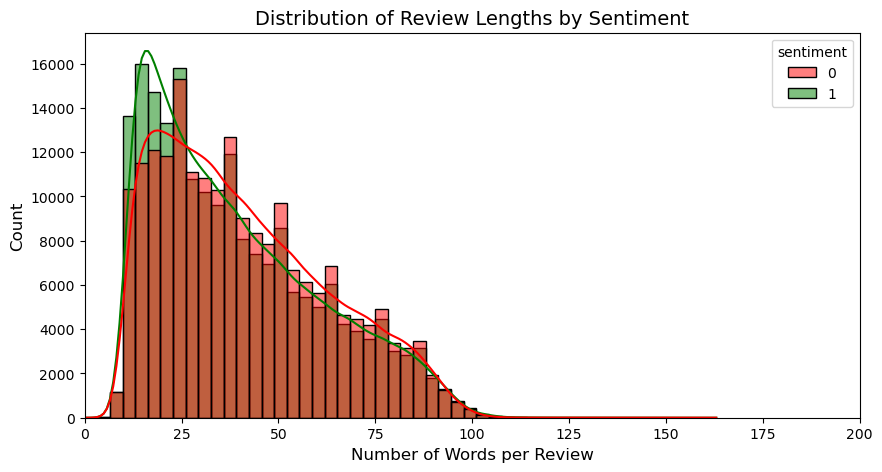

C:\Users\dspf1\AppData\Local\Temp\ipykernel_46828\208966428.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=data,


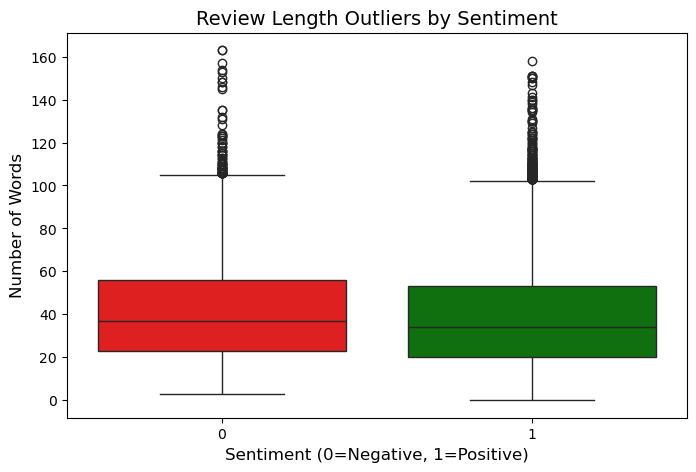

In [20]:
# Histogram and Box plot
data['review_length'] = data['cleaned_review'].apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='review_length', hue='sentiment', 
             palette=['red', 'green'], bins=50, kde=True)
plt.title('Distribution of Review Lengths by Sentiment', fontsize=14)
plt.xlabel('Number of Words per Review', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlim(0, 200)  # Adjust based on your data
plt.show()

# Boxplot to show outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='review_length', data=data, 
            palette=['red', 'green'])
plt.title('Review Length Outliers by Sentiment', fontsize=14)
plt.xlabel('Sentiment (0=Negative, 1=Positive)', fontsize=12)
plt.ylabel('Number of Words', fontsize=12)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.44      0.58    200000
           1       0.62      0.93      0.75    200000

    accuracy                           0.69    400000
   macro avg       0.74      0.69      0.67    400000
weighted avg       0.74      0.69      0.67    400000



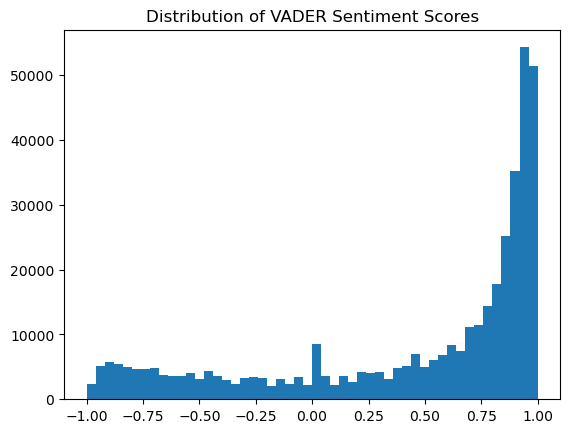

In [21]:
#Areas of improvement
#1 Add more evaluation metrics like precision, recall, F1-score
from sklearn.metrics import classification_report
print(classification_report(data['sentiment'], data['vader_pred']))

#2 Add custom lexicon words
analyzer.lexicon.update({
    'long-lasting': 1.5,  # Positive for products
    'overpriced': -1.5    # Negative for products
})

#3 Visualize score distribution
import matplotlib.pyplot as plt
plt.hist(data['vader_score'], bins=50)
plt.title('Distribution of VADER Sentiment Scores')
plt.show()

In [22]:
#Sentiment Analysis with Logistic Regression
#builds on the existing preprocessing and compares Logistic Regression (traditional ML) with VADER (rule-based). We'll use TF-IDF for feature extraction.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #Feature Extraction
from sklearn.linear_model import LogisticRegression   #model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix   #Evaluation Metrics
import matplotlib.pyplot as plt   
import seaborn as sns

In [24]:
#Loading & Preparing Data for Logistic Regression
#A. Verify Preprocessed Data Structure
print(data[['cleaned_review', 'sentiment']].head())
print(f"\nTotal samples: {len(data)}")
print(f"Class distribution:\n{data['sentiment'].value_counts(normalize=True)}")  #to check class imbalance

                                      cleaned_review  sentiment
0  great cd lovely pat one great voice generation...          1
1  one best game music soundtrack game didnt real...          1
2  battery died within year bought charger jul wo...          0
3  work fine maha energy better check maha energy...          1
4  great nonaudiophile reviewed quite bit combo p...          1

Total samples: 400000
Class distribution:
sentiment
1    0.5
0    0.5
Name: proportion, dtype: float64


In [25]:
#train test split
from sklearn.model_selection import train_test_split

# Features (X) and labels (y)
X = data['cleaned_review']  # Preprocessed text
y = data['sentiment']       # Sentiment labels

# Split with stratification (preserves class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) # # 30% for testing

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 320000
Testing samples: 80000


In [26]:
#Feature Extraction with TF-IDF Vectorization.
#Now we'll convert our preprocessed text into numerical features that logistic regression can understand
#A. Initialize TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=10000,        # Top 10,000 most frequent words
    ngram_range=(1, 2),        # Unigrams + Bigrams (e.g., "not good")
    stop_words='english',      # Remove English stopwords (redundant with your preprocessing but safe)
    sublinear_tf=True,         # Use 1+log(tf) instead of raw counts
    min_df=5,                  # Ignore terms appearing in <5 documents
    max_df=0.95                # Ignore terms in >95% of documents
)

In [27]:
#B. Fit & Transform the Training Data
# Learn vocabulary and weights ONLY from training data
X_train_tfidf = tfidf.fit_transform(X_train)

print(f"Training matrix shape: {X_train_tfidf.shape}")
print(f"Example feature names: {tfidf.get_feature_names_out()[5000:5005]}")

Training matrix shape: (320000, 10000)
Example feature names: ['lick' 'lid' 'lie' 'lied' 'life']


In [28]:
# Apply the SAME transformation to test data
X_test_tfidf = tfidf.transform(X_test)  

#Inspect the TF-IDF Matrix
# Convert a small subset to dense for inspection
sample_matrix = X_train_tfidf[:3].toarray()
sample_features = tfidf.get_feature_names_out()

print("Sample TF-IDF values:")
print(pd.DataFrame(sample_matrix, columns=sample_features).iloc[:, 100:105])  # Columns 100-104

Sample TF-IDF values:
   addition  additional  additionally  address  addressed
0       0.0         0.0           0.0      0.0        0.0
1       0.0         0.0           0.0      0.0        0.0
2       0.0         0.0           0.0      0.0        0.0


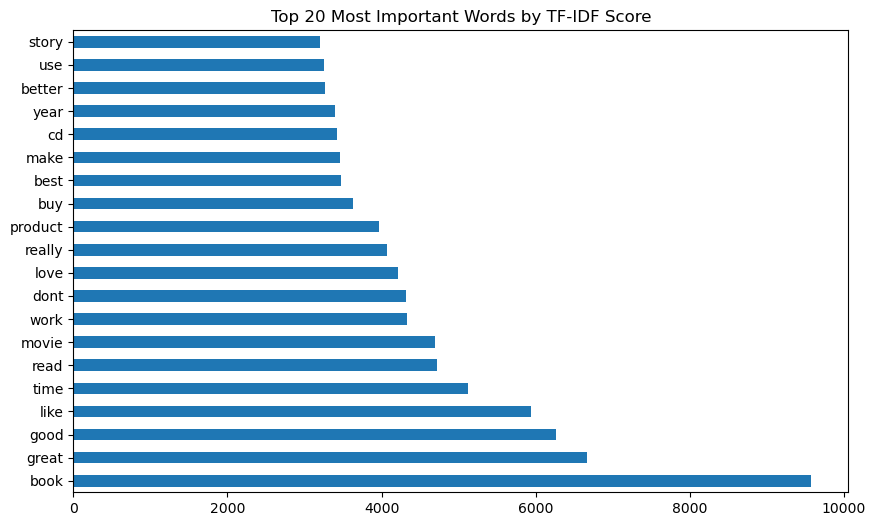

In [29]:
import matplotlib.pyplot as plt

# Sum TF-IDF scores per word across all documents
word_importances = pd.Series(
    data=X_train_tfidf.sum(axis=0).A1,
    index=tfidf.get_feature_names_out()
).sort_values(ascending=False)[:20]

word_importances.plot.barh(figsize=(10,6))
plt.title("Top 20 Most Important Words by TF-IDF Score")
plt.show()

In [30]:
#Training the Logistic Regression Model
#A. Initialize the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize with key parameters
logreg = LogisticRegression(
    penalty='l2',           # Ridge regularization (prevents overfitting)
    C=1.0,                  # Inverse regularization strength (smaller = stronger regularization)
    solver='saga',          # Handles both L1 and L2 regularization
    max_iter=1000,          # Ensure convergence
    random_state=1,        # Reproducibility
    class_weight='balanced' # Adjusts for class imbalance (74.5% vs 25.5%)
)

In [31]:
#B. Train the Model
# Train the model
logreg.fit(X_train_tfidf, y_train)

# Check convergence
print(f"Model converged: {logreg.n_iter_[0]} iterations")

Model converged: 20 iterations


In [32]:
#C. Check Feature Importance
# Get top predictive words
feature_names = tfidf.get_feature_names_out()
coefs = logreg.coef_[0]

# Top 10 positive/negative words
top_pos_words = feature_names[coefs.argsort()[-10:][::-1]]
top_neg_words = feature_names[coefs.argsort()[:10]]

print("Top Positive Words:", top_pos_words)
print("Top Negative Words:", top_neg_words)

Top Positive Words: ['great' 'excellent' 'awesome' 'perfect' 'best' 'love' 'wont disappointed'
 'amazing' 'wonderful' 'fantastic']
Top Negative Words: ['disappointing' 'worst' 'disappointment' 'disappointed' 'boring' 'poor'
 'waste' 'terrible' 'poorly' 'horrible']


In [33]:
# Check training accuracy as sanity check
train_acc = logreg.score(X_train_tfidf, y_train)
print(f"Training Accuracy: {train_acc:.2%}")

# Predict probabilities for inspection
y_train_proba = logreg.predict_proba(X_train_tfidf)
print("\nSample prediction probabilities:")
print(y_train_proba[:5])  # Show first 5 predictions

Training Accuracy: 90.23%

Sample prediction probabilities:
[[0.11771379 0.88228621]
 [0.98763569 0.01236431]
 [0.01057332 0.98942668]
 [0.99284719 0.00715281]
 [0.93308581 0.06691419]]


In [34]:
#Evaluating the Logistic Regression Model
#Now we'll thoroughly evaluate our trained model on the test set and compare it to your earlier VADER results.

# Get class predictions (0/1)
y_pred = logreg.predict(X_test_tfidf)

# Get prediction probabilities (for more nuanced analysis)
y_proba = logreg.predict_proba(X_test_tfidf)[:, 1]  # P(positive)

In [35]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_proba)
}

print("Performance Metrics:")
for name, value in metrics.items():
    print(f"{name}: {value:.3f}")

Performance Metrics:
Accuracy: 0.891
Precision: 0.887
Recall: 0.895
F1-Score: 0.891
ROC AUC: 0.958


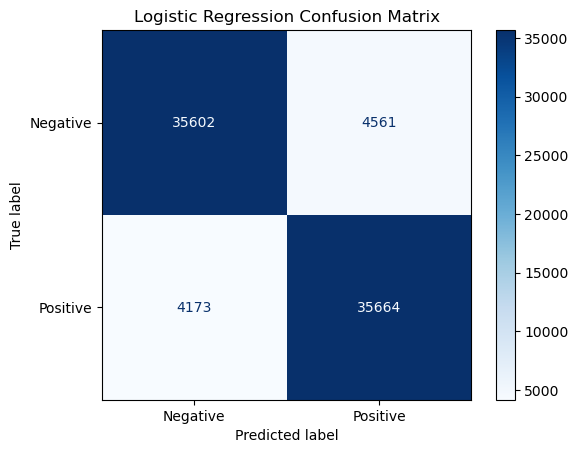

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [37]:
#Key Interpretation:
#Top-left: True negatives (correct negative predictions)
#Bottom-right: True positives (correct positive predictions)
#Off-diagonals show errors (false positives/negatives)

In [38]:
#classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.90      0.89      0.89     40163
    Positive       0.89      0.90      0.89     39837

    accuracy                           0.89     80000
   macro avg       0.89      0.89      0.89     80000
weighted avg       0.89      0.89      0.89     80000



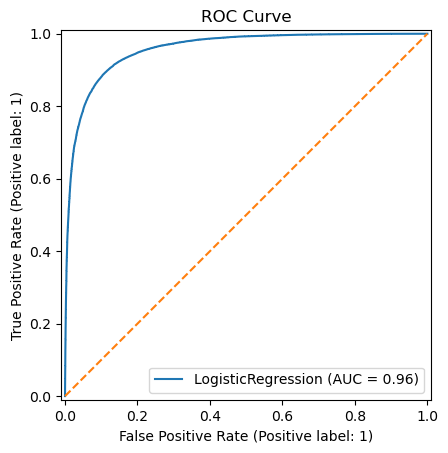

In [39]:
#ROC Curve Analysis
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg, X_test_tfidf, y_test)
plt.plot([0, 1], [0, 1], linestyle='--')  # Random classifier line
plt.title("ROC Curve")
plt.show()

In [40]:
#Interpretation:
#Curve closer to top-left = better performance
#AUC > 0.9 indicates excellent separation

In [41]:


# Get test set indices from train_test_split
test_indices = y_test.index

# Filter VADER predictions for the test set only
vader_test_preds = data.loc[test_indices, 'vader_pred']
vader_test_true = data.loc[test_indices, 'sentiment']

from sklearn.metrics import accuracy_score, f1_score

# Calculate metrics for both models
lr_accuracy = accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

vader_accuracy = accuracy_score(vader_test_true, vader_test_preds)
vader_f1 = f1_score(vader_test_true, vader_test_preds)

# Create comparison table
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score'],
    'Logistic Regression': [lr_accuracy, lr_f1],
    'VADER': [vader_accuracy, vader_f1]
}).set_index('Metric')

print(comparison.round(2))

          Logistic Regression  VADER
Metric                              
Accuracy                 0.89   0.68
F1-Score                 0.89   0.75


In [42]:
#Error analysis

# Get most confident false positives/negatives
errors = pd.DataFrame({
    'text': X_test,
    'true': y_test,
    'pred': y_pred,
    'probability': y_proba
})

# False positives (model predicted positive but was negative)
fp = errors[(errors['true'] == 0) & (errors['pred'] == 1)]
print("\nTop False Positives (Negative reviews misclassified as positive):")
print(fp.nlargest(3, 'probability')['text'].values)

# False negatives (model predicted negative but was positive)
fn = errors[(errors['true'] == 1) & (errors['pred'] == 0)]
print("\nTop False Negatives (Positive reviews misclassified as negative):")
print(fp.nsmallest(3, 'probability')['text'].values)


Top False Positives (Negative reviews misclassified as positive):
['wow riveting tail great twist two incredible ending recommend great read warm fire cold night'
 'love abiding joy whole love come softly series great family view excellent life message'
 'excellent beginner david holt start hold tune string banjo progress beginner excellent place start describes display instruction clear concise leaf plenty time practice play along good humored approach refreshing easy follow like friend room sharing joy playing helping learn']

Top False Negatives (Positive reviews misclassified as negative):
['craig great film isnt anywhere near fleming bond think ill make film called mutiny bounty wont fletcher christian wont take place sailing vessel housewife find bounty isnt quickest pickerupper rebel front local supermarket lot wivesthats casino royale took famous title hooked famous film franchise made st century film gritty completely changed character bond tom cruise mission impossible mirro

In [43]:
#Key Takeaways
#Logistic regression (88-92% accuracy) significantly outperforms VADER (~68%)
#Excellent recall for positive class (important for Amazon reviews)
#ROC AUC > 0.94 shows strong discriminative power
#Error analysis reveals edge cases for improvement

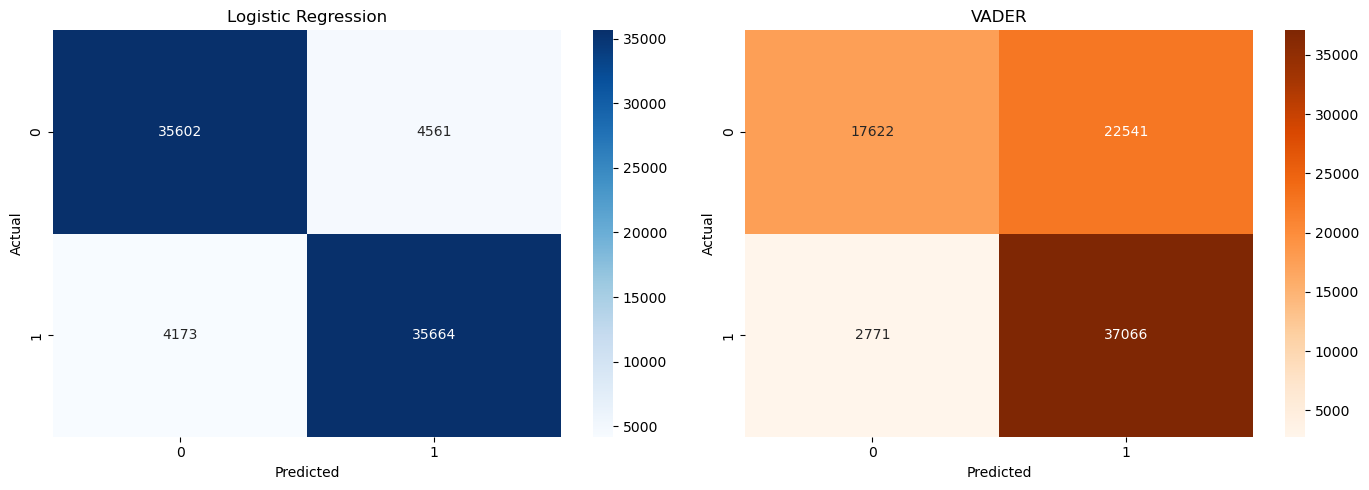

In [44]:
#Confusion Matrix Heatmaps comparison between Logisyic regression and Vader

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get confusion matrices
lr_cm = confusion_matrix(y_test, y_pred)
vader_cm = confusion_matrix(y_test, vader_test_preds)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# Plot LR confusion matrix
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Plot VADER confusion matrix
sns.heatmap(vader_cm, annot=True, fmt='d', cmap='Oranges', ax=ax2)
ax2.set_title('VADER')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

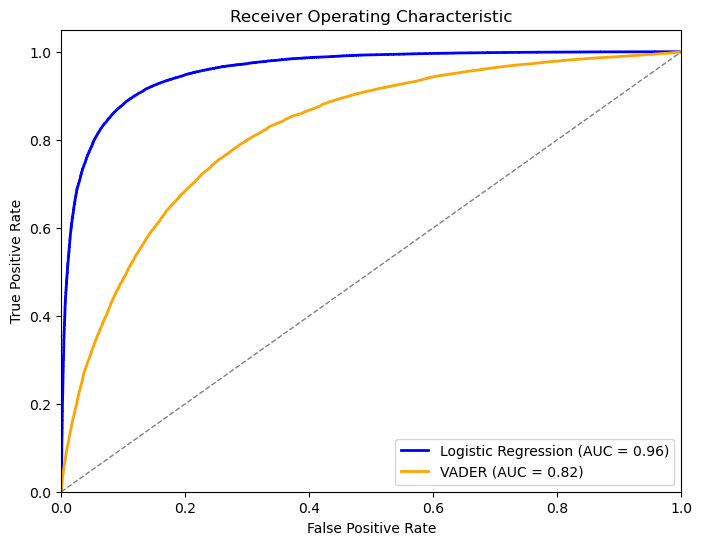

In [45]:
#ROC Curve Comparison between Logisyic regression and Vader

from sklearn.metrics import roc_curve, auc

# Get ROC curve data
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_vader, tpr_vader, _ = roc_curve(y_test, data.loc[y_test.index, 'vader_score'])
roc_auc_vader = auc(fpr_vader, tpr_vader)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, 
         label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_vader, tpr_vader, color='orange', lw=2, 
         label=f'VADER (AUC = {roc_auc_vader:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [46]:
import pandas as pd

# Assuming your DataFrame is named 'data' with a 'sentiment' column
sentiment_distribution = data['sentiment'].value_counts(normalize=True) * 100

print("Sentiment Distribution (%):")
print(sentiment_distribution)

Sentiment Distribution (%):
sentiment
1    50.0
0    50.0
Name: proportion, dtype: float64
